In [1]:
#How is the ratio of  hospitalized cases to confirmed cases related to death?

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [3]:
csvpath1 = 'DataCleaning_seobin/Resources/GA_county_cases.csv'
Case_df = pd.read_csv(csvpath1)
Case_df


,county_name,cases,county_id,State FIPS code,County FIPS code,population,hospitalization,deaths,case rate,death rate,14 day case rate,14 day cases,antigen_cases,probable_deaths
0,Appling,1717,US-13001,13,1,18561,142,50,9250.58,269.38,511.83,95,316,4
1,Atkinson,745,US-13003,13,3,8330,108,15,8943.58,180.07,276.11,23,204,0
2,Bacon,1002,US-13005,13,5,11404,73,25,8786.39,219.22,499.82,57,323,6
3,Baker,151,US-13007,13,7,3116,31,6,4845.96,192.55,128.37,4,57,0
4,Baldwin,3542,US-13009,13,9,44428,273,90,7972.45,202.57,535.70,238,497,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Whitfield,13628,US-13313,13,313,104672,660,169,13019.72,161.46,728.94,763,1585,9
157,Wilcox,434,US-13315,13,315,8790,66,26,4937.43,295.79,182.03,16,300,17
158,Wilkes,611,US-13317,13,317,10014,61,15,6101.46,149.79,499.30,50,328,5
159,Wilkinson,665,US-13319,13,319,8919,108,21,7455.99,235.45,325.15,29,158,0


In [4]:
filtered_Case_df = Case_df[['county_name', 'cases','hospitalization','deaths','case rate','death rate']]
cleaned_Case_df = filtered_Case_df.rename(columns={'county_name':'County',
                                 'cases':'Cases',
                                 'hospitalization':'Hospitalization',
                                 'deaths':'Deaths',
                                 'case rate':'Cases/100,000Population',
                                 'death rate':'Deaths/100,000Population'})
cleaned_Case_df

,County,Cases,Hospitalization,Deaths,"Cases/100,000Population","Deaths/100,000Population"
0,Appling,1717,142,50,9250.58,269.38
1,Atkinson,745,108,15,8943.58,180.07
2,Bacon,1002,73,25,8786.39,219.22
3,Baker,151,31,6,4845.96,192.55
4,Baldwin,3542,273,90,7972.45,202.57
...,...,...,...,...,...,...
156,Whitfield,13628,660,169,13019.72,161.46
157,Wilcox,434,66,26,4937.43,295.79
158,Wilkes,611,61,15,6101.46,149.79
159,Wilkinson,665,108,21,7455.99,235.45


In [5]:
ratio_hos = cleaned_Case_df["Hospitalization"]*100/cleaned_Case_df["Cases"]
cleaned_Case_df["Percentage of hospitalization (%)"] = ratio_hos

cleaned_Case_df.head()

,County,Cases,Hospitalization,Deaths,"Cases/100,000Population","Deaths/100,000Population",Percentage of hospitalization (%)
0,Appling,1717,142,50,9250.58,269.38,8.270239
1,Atkinson,745,108,15,8943.58,180.07,14.496644
2,Bacon,1002,73,25,8786.39,219.22,7.285429
3,Baker,151,31,6,4845.96,192.55,20.529801
4,Baldwin,3542,273,90,7972.45,202.57,7.707510


The r-squared is: 0.028901071419757497


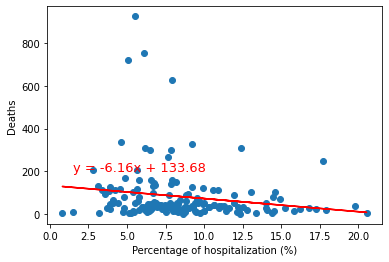

In [6]:
x_values = cleaned_Case_df['Percentage of hospitalization (%)']
y_values = cleaned_Case_df['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.5,200),fontsize=13,color="red")
plt.xlabel('Percentage of hospitalization (%)')
plt.ylabel('Deaths')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('DataAnalysis_seobin/hospitalvsdeath.png')
plt.show()


In [7]:
csvpath2 = 'DataCleaning_seobin/Resources/Characteristics.csv'
hosp_df = pd.read_csv(csvpath2)
hosp_df

,Primary Strata,Primary Strata Name,Secondary Strata,Secondary Strata Name,Count,Percent
0,Age,0-4 yr,Sex,Male,289.0,56.8
1,Age,0-4 yr,Sex,Female,220.0,43.2
2,Age,0-4 yr,Race/Ethnicity,White,90.0,17.7
3,Age,0-4 yr,Race/Ethnicity,Black,140.0,27.5
4,Age,0-4 yr,Race/Ethnicity,Hispanic/Latino,210.0,41.3
...,...,...,...,...,...,...
1053,In-hospital death,No,Race/Ethnicity,Black,NaN,29.1
1054,In-hospital death,No,Race/Ethnicity,Hispanic/Latino,NaN,23.0
1055,In-hospital death,No,Race/Ethnicity,Asian/Pacific Islander,NaN,5.8
1056,In-hospital death,No,Race/Ethnicity,American Indian/Alaska Native,NaN,1.3


In [8]:
death_hosp_df = hosp_df.loc[(hosp_df['Primary Strata'] == 'In-hospital death') 
                  & (hosp_df['Secondary Strata'] == 'Age'),
                                  ['Primary Strata','Primary Strata Name','Secondary Strata', 
                                   'Secondary Strata Name', 'Count', 'Percent']]

death_hosp_df



,Primary Strata,Primary Strata Name,Secondary Strata,Secondary Strata Name,Count,Percent
1036,In-hospital death,Yes,Age,18-49 yr,NaN,5.4
1037,In-hospital death,Yes,Age,50-64 yr,NaN,20.4
1038,In-hospital death,Yes,Age,65+ yr,NaN,74.1
1047,In-hospital death,No,Age,18-49 yr,NaN,31.2
1048,In-hospital death,No,Age,50-64 yr,NaN,29.8
1049,In-hospital death,No,Age,65+ yr,NaN,37.4


In [9]:
death_hosp = death_hosp_df.groupby(['Primary Strata Name', 'Secondary Strata Name'])['Percent'].sum().unstack().fillna(0)

death_hosp


Secondary Strata Name,18-49 yr,50-64 yr,65+ yr
Primary Strata Name,,,
No,31.2,29.8,37.4
Yes,5.4,20.4,74.1


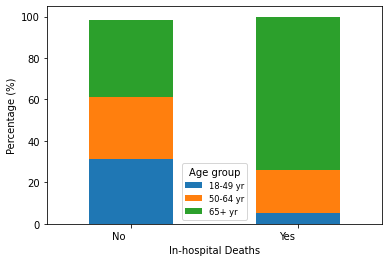

In [10]:
#Create bar graph regarding in-hospital deaths 
death_hosp.plot(kind = 'bar', stacked = True, rot = 0)
plt.legend( title="Age group", loc=8, fontsize='small', fancybox=True)
plt.xlabel('In-hospital Deaths')
plt.ylabel('Percentage (%)')
plt.savefig('DataAnalysis_seobin/In-hospitalDeaths.png')
plt.show()